## 4.9.2 Part 2 Visualization Task

### This script contains the following points:

#### 1. Import data & Check dimensions
#### 2. Exercise Charts - refer to Notebook: 4.9 Visualization
#### 3. Histogram: 'order_hour_of_day'
#### 4. Bar Chart: 'loyalty_flag'
#### 5. Create Sample data for Line Chart: 'prices'/'order_hour_of_day'
#### 6. Line Chart: 'age'/'dependents'
#### 7. Scatterplot: 'age'/'income'
#### 8. Export data

### 01. Import data & Check dimensions

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Tell pandas not to truncate columns

pd.set_option('display.max_columns', None)

In [3]:
# Create string path for main project folder

path = r'/Users/AngieUS/Desktop/Instacart Project'

# Import orders_products_all data (orders_products_all.pkl data file from part 1 task)

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# Check df_all

df_all.head()  

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag,first_name,last_name,gender,state,age,date_joined,dependents,fam_status,income,_merge
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [4]:
# Display dimensions of df_all

df_all.shape

(28662590, 32)

### 02. Exercise Charts

#### For Question 2 in Step 2, please refer to 4.9 Visualization notebook for the exercise charts.

### 03. Histogram: 'order_hour_of_day'

In [5]:
# List the frequency of the 'order_hour_of_day' column

df_all['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2450817
11    2423841
14    2380170
15    2354285
13    2352238
12    2310100
16    2237252
9     2184789
17    1837763
8     1532787
18    1434691
19    1105471
20     858761
7      797564
21     705983
22     559151
23     353495
6      260188
0      192202
1      102120
5       78296
2       60104
4       45861
3       44661
Name: count, dtype: int64

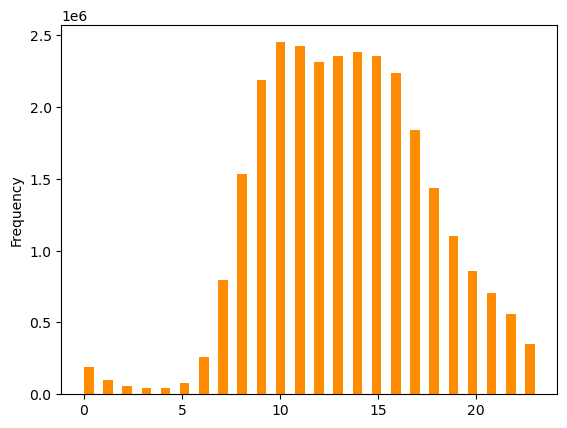

In [6]:
# Create a histogram for the 'order_hour_of_day' column

hist = df_all['order_hour_of_day'].plot.hist(bins = 47, color='darkorange')

#### Describe Histogram: The histogram reflects very little order activity in the early morning hours. Then from about 10am to 3pm, orders are at their highest. Then as the day ends and we get into evening time, orders start to gradually taper off. This shape is expected as most everyone is asleep during the early morning hours, fully active during the midday to late afternoon, and then slowly winding down in the evening/night. 

In [7]:
# Export histogram chart image

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours.png'))

### 04. Bar Chart: 'loyalty_flag'

In [8]:
# List the frequency of the 'loyalty_flag' column

df_all['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    14265253
Loyal customer       9527763
New customer         4869574
Name: count, dtype: int64

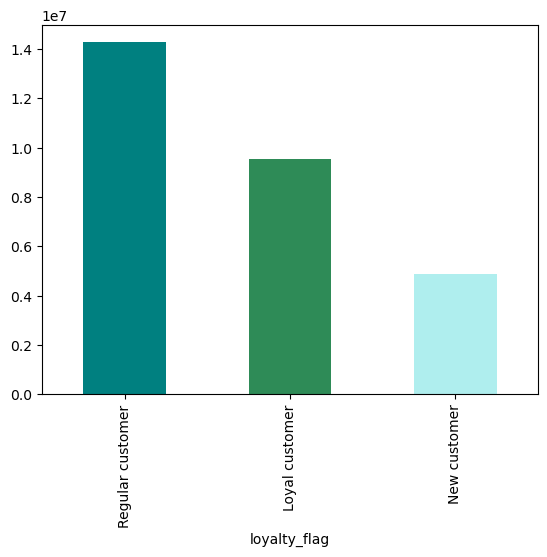

In [9]:
# Create bar chart for 'loyalty flag' column

bar = df_all['loyalty_flag'].value_counts().plot.bar(color=['teal','seagreen','paleturquoise'])

In [10]:
# Export bar chart image

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

### 05. Create Sample data for Line Chart: 'prices'/'order_hour_of_day'

In [11]:
# Create a sample subset to use for Line Chart computing
# Create a list holding True/False values 70/30

np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

In [12]:
# Store 70% of the sample in the dataframe big

big = df_all[dev]

In [13]:
# Store 30% of the sample in the dataframe small

small = df_all[~dev]

In [14]:
# Check df_all total

len(df_all)

28662590

In [15]:
# Verify sample splits

len(big) + len(small)

28662590

In [16]:
# Optimize processing by reducing sample set to only those columns necessary for the chart - prices, order_hour_of_day

df_small = small[['order_hour_of_day','prices']]

/opt/anaconda3/envs/cfinstacart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/cfinstacart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


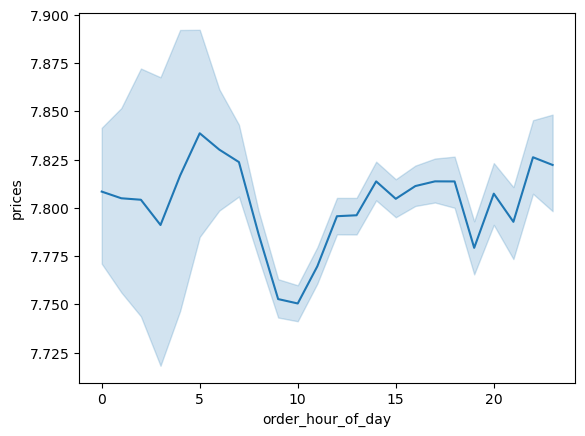

In [17]:
# Use sample data created - small set - df_small
# Create a line chart to show the development of the 'prices' column across the hours of the day
# Plot the 'order_hour_of_day' column on x-axis and 'prices' column on y-axis

line = sns.lineplot(data = df_small, x = 'order_hour_of_day',y = 'prices')

In [18]:
# Export line chart image

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

### 06. Line Chart: 'age'/'dependents'

In [19]:
# Optimize processing by reducing sample set to only those columns necessary for the chart - age, dependents

df_smallset = small[['age','dependents']]

/opt/anaconda3/envs/cfinstacart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/cfinstacart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


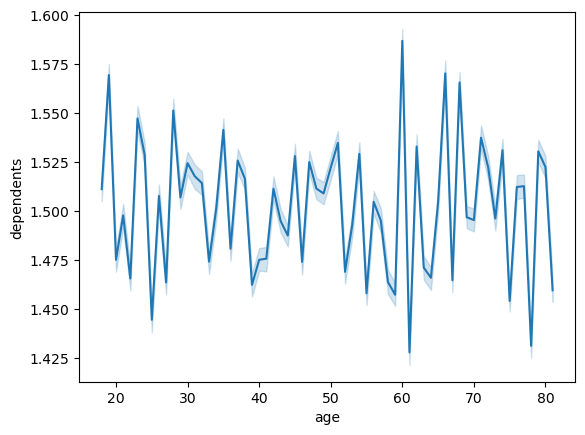

In [20]:
# Use sample data created - small set - df_small
# Create a line chart to show the development of the 'prices' column across the hours of the day
# Plot the 'order_hour_of_day' column on x-axis and 'prices' column on y-axis

line = sns.lineplot(data = df_smallset, x = 'age',y = 'dependents')

#### Describe Line Chart: The chart shows a very sporadic line for age and number of dependents. There is no pattern or trend. The average number of dependents - no matter the age - varies greatly. However, the slight variance in the average - it hovers around 1.5 - means that customers in general, no matter the age, have probably 1-2 dependents. Those that have 0 balace out those who have 3 (max). The relatively thin error bands means that the chart has a fairly decent confidence level.

In [21]:
# Export line chart image

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

### 07. Scatterplot: 'age'/'income'

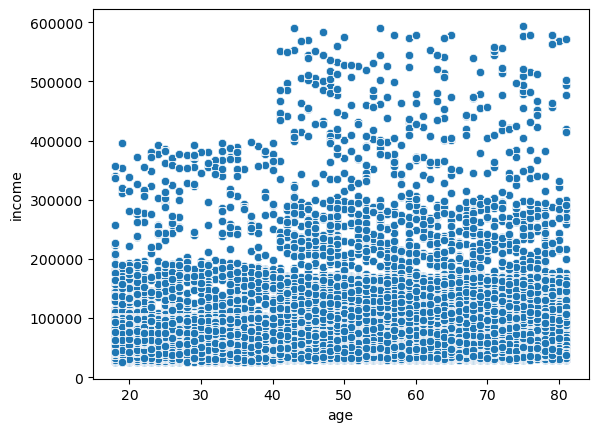

In [24]:
# Create a scatterplot for the 'age' and 'income'

plt = sns.scatterplot(x = 'age', y = 'income',data = df_all)

#### Describe Scatterplot: This scatterplot reflects a definite demarcation at about age 40 when income rises above 400k. Predominantly, income is consistent for all age groups that earn under 200K. Again, a higher concentration of over 40 earn from 200-300k... whereas there appears to be a concentration of 30-40 year olds earning in the 400k realm. There doesn't seem to be any obvious outliers.

In [25]:
# Export scatterplot chart image

plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_age_income.png'))